In [326]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
%config IPCompleter.greedy=True

In [229]:
all_causes = pd.read_csv('year_county_T40.0-4.txt', sep = '\t')
fent = pd.read_csv('year_county_only40.4.txt', sep = '\t')
fent_all_years = pd.read_csv('county_only40.4.txt', sep = '\t')
fent_12on = pd.read_csv('county_only40.4_2012on.txt', sep = '\t')
fent_national_by_year = pd.read_csv('grouped_by_year_not_county_only40.4.txt', sep = '\t')
all_national_by_year = pd.read_csv('grouped_by_year_not_county_all_opioids.txt', sep = '\t')
fent_16plus17 = pd.read_csv('fent_county_only1617.txt', sep = '\t')

In [230]:
all_causes = all_causes.drop(['Notes', 'Year Code'], axis = 'columns')
all_causes.columns = ['county', 'county_code', 'year', 'deaths', 'population', 'crude_rate']
fent = fent.drop(['Notes', 'Year Code'], axis = 'columns')
fent.columns = ['county', 'county_code', 'year', 'deaths', 'population', 'crude_rate']
fent_all_years = fent_all_years.drop('Notes', axis = 'columns')
fent_all_years.columns = ['county', 'county_code', 'deaths', 'population', 'crude_rate']
fent_12on = fent_12on.drop('Notes', axis = 'columns')
fent_12on.columns = ['county', 'county_code', 'deaths', 'population', 'crude_rate']
fent_national_by_year = fent_national_by_year.drop(['Notes', 'Year Code'], axis = 'columns')
fent_national_by_year.columns = ['year', 'deaths', 'population', 'crude_rate']
all_national_by_year = all_national_by_year.drop(['Notes', 'Year Code'], axis = 'columns')
all_national_by_year.columns = ['year', 'deaths', 'population', 'crude_rate']
fent_16plus17 = fent_16plus17.drop(['Notes'], axis = 'columns')
fent_16plus17.columns = ['county', 'county_code', 'deaths', 'population', 'crude_rate']

In [231]:
all_causes.dropna(inplace = True)
fent.dropna(inplace = True)
fent_all_years.dropna(inplace = True)
fent_12on.dropna(inplace = True)
fent_national_by_year.dropna(inplace = True)
all_national_by_year.dropna(inplace = True)
fent_16plus17.dropna(inplace = True)

In [232]:
counties = gpd.read_file('us-counties.json')

In [233]:
# convert to number, replace suppressed and missing with 0 for now?

In [234]:
fent['state'] = fent.county.apply(lambda x: x[-2:])
all_causes['state'] = all_causes.county.apply(lambda x: x[-2:])
fent_all_years['state'] = fent_all_years.county.apply(lambda x: x[-2:])
fent_12on['state'] = fent_12on.county.apply(lambda x: x[-2:])

In [235]:
fent = fent[fent.state != 'AK']
fent = fent[fent.state != 'HI']
all_causes = all_causes[all_causes.state != 'AK']
all_causes = all_causes[all_causes.state != 'HI']
fent_all_years = fent_all_years[fent_all_years.state != 'AK']
fent_all_years = fent_all_years[fent_all_years.state != 'HI']
fent_12on = fent_12on[fent_12on.state != 'AK']
fent_12on = fent_12on[fent_12on.state != 'HI']

In [237]:
def convert_suppressed(entry):
    if entry == 'Suppressed':
        return 0
    elif entry == 'Missing':
        return 0
    else:
        return int(entry)
fent['deaths'] = fent['deaths'].apply(convert_suppressed)
all_causes['deaths'] = all_causes['deaths'].apply(convert_suppressed)
fent_all_years['deaths'] = fent_all_years['deaths'].apply(convert_suppressed)
fent_12on['deaths'] = fent_12on['deaths'].apply(convert_suppressed)
fent_16plus17['deaths'] = fent_16plus17['deaths'].apply(convert_suppressed)

In [174]:
# make some line charts showing increase and how much of the increase is due to fentanyl
# group by state
# start to group by county, get 2016-2017 together, then 2015-2017 together, etc


In [175]:
opioids_no_fentanyl = all_national_by_year.copy()
opioids_no_fentanyl['deaths'] = opioids_no_fentanyl['deaths'] - fent_national_by_year['deaths']

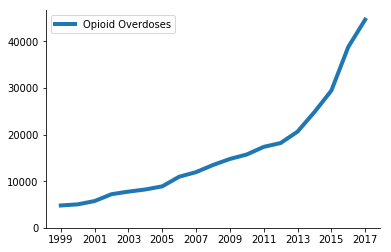

In [159]:
x = all_national_by_year.year
y = all_national_by_year.deaths
ax = plt.subplot(111)
ax.plot(x, y, linewidth = 4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(range(1999, 2018, 2))
plt.yticks(range(0, 50000, 10000))
plt.legend(['Opioid Overdoses'])
plt.savefig('Opioid Overdoses.png')

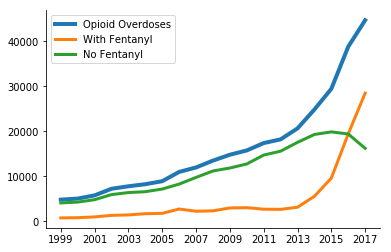

In [160]:
x = all_national_by_year.year
y = all_national_by_year.deaths
ax = plt.subplot(111)
ax.plot(x, y, linewidth = 4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(range(1999, 2018, 2))
plt.yticks(range(0, 50000, 10000))
y = fent_national_by_year.deaths
ax.plot(x,y, linewidth = 3)
y = opioids_no_fentanyl.deaths
ax.plot(x,y, linewidth = 3)
plt.legend(['Opioid Overdoses', 'With Fentanyl', 'No Fentanyl'])
plt.savefig('Overdose Graph with Fentanyl.png')

In [239]:
print('Counties with suppressed information: ', sum(fent_all_years.deaths == 0))
print('Total number of deaths unaccounted for in county level data: ', fent_national_by_year.deaths.sum() - fent_all_years.deaths.sum())

Counties with suppressed information:  1941
Total number of deaths unaccounted for in county level data:  5534.0


In [240]:
fent_national_by_year[fent_national_by_year.year == 2017].deaths

18    28466.0
Name: deaths, dtype: float64

In [241]:
fent[fent.year == 2017].deaths.sum()

24955

In [242]:
has_2017 = list(fent[((fent.year == 2017) & (fent.deaths > 0))].county)
missing_2016 = list(fent[(fent.year == 2016) & (fent.deaths == 0)].county)
interpolate = list(x for x in missing_2016 if x in has_2017)

In [243]:
print(len(interpolate))
print(len(has_2017))
print(len(missing_2016))

149
477
2766


In [245]:
fent_16plus17[fent_16plus17.county.isin(interpolate)]

,county,county_code,deaths,population,crude_rate
27,"Etowah County, AL",1055.0,16,205319,Unreliable
44,"Madison County, AL",1089.0,19,718013,Unreliable
173,"Pulaski County, AR",5119.0,21,787206,2.7
195,"Contra Costa County, CA",6013.0,23,2282566,1.0
203,"Kern County, CA",6029.0,18,1777907,Unreliable
224,"San Bernardino County, CA",6071.0,20,4297500,0.5
230,"Santa Barbara County, CA",6083.0,15,894320,Unreliable
244,"Ventura County, CA",6111.0,31,1703961,1.8
247,"Adams County, CO",8001.0,22,1001354,2.2
286,"Mesa County, CO",8077.0,16,301699,Unreliable


In [404]:
def calculate_deaths(row):
    if row.deaths > 0:
        return row.deaths
    elif row.county in interpolate:
        return fent_16plus17.loc[fent_16plus17.county == row.county, 'deaths'].values[0] - fent.loc[(fent.county == row.county) & (fent.year == 2017), 'deaths'].values[0]


In [405]:
fent.loc[fent.year == 2016, 'predicted_deaths'] = fent[fent.year == 2016].apply(calculate_deaths, axis = 1)

In [402]:
fent[fent.county.isin(interpolate)]

,county,county_code,year,deaths,population,crude_rate,state,test_column
513,"Etowah County, AL",1055,1999.0,0,104002,Suppressed,AL,NaN
514,"Etowah County, AL",1055,2000.0,0,103459,Suppressed,AL,NaN
515,"Etowah County, AL",1055,2001.0,0,102976,Suppressed,AL,NaN
516,"Etowah County, AL",1055,2002.0,0,102988,Suppressed,AL,NaN
517,"Etowah County, AL",1055,2003.0,0,103025,Suppressed,AL,NaN
518,"Etowah County, AL",1055,2004.0,0,103080,Suppressed,AL,NaN
519,"Etowah County, AL",1055,2005.0,0,103174,Suppressed,AL,NaN
520,"Etowah County, AL",1055,2006.0,0,103528,Suppressed,AL,NaN
521,"Etowah County, AL",1055,2007.0,0,103893,Suppressed,AL,NaN
522,"Etowah County, AL",1055,2008.0,0,104206,Suppressed,AL,NaN


In [259]:
counties.columns = ['county_code', 'name', 'geometry']
counties.county_code = counties.county_code.apply(int)
fent.county_code = fent.county_code.apply(int)

In [278]:
geodf = counties.merge(fent, on = 'county_code')
geodf['pc'] = geodf.deaths/geodf.population.apply(int) * 100000

In [331]:
def assign_color(value):
    if value > 50:
        return 1
    elif value > 35:
        return 0.75
    elif value > 20:
        return 0.5
    elif value > 0:
        return 0.25
    else:
        return 0
geodf['color'] = geodf['pc'].apply(assign_color)

In [408]:
geodf[geodf.year == 2017].sort_values(by = 'pc', ascending = False)

,county_code,name,geometry,county,year,deaths,population,crude_rate,state,pc,color
55745,54011,Cabell,"POLYGON ((-82.265742 38.599529, -82.216449 38....","Cabell County, WV",2017.0,118,94958,124.3,WV,124.265465,1.00
56581,54099,Wayne,"POLYGON ((-82.561497 38.40236, -82.506727 38.4...","Wayne County, WV",2017.0,38,40153,94.6,WV,94.638010,1.00
38550,39047,Fayette,"POLYGON ((-83.651408 39.716825, -83.251591 39....","Fayette County, OH",2017.0,24,28752,83.5,OH,83.472454,1.00
39177,39113,Montgomery,"POLYGON ((-84.155286 39.924949, -84.051224 39....","Montgomery County, OH",2017.0,434,531542,81.6,OH,81.649239,1.00
22457,24510,Baltimore,"POLYGON ((-76.651878 39.371778, -76.525908 39....","Baltimore city, MD",2017.0,398,611648,65.1,MD,65.070106,1.00
55669,54003,Berkeley,"POLYGON ((-78.021113 39.61824, -77.823943 39.4...","Berkeley County, WV",2017.0,73,114920,63.5,WV,63.522450,1.00
56049,54043,Lincoln,"POLYGON ((-82.04666400000001 38.374975, -81.91...","Lincoln County, WV",2017.0,13,20825,Unreliable,WV,62.424970,1.00
38360,39027,Clinton,"POLYGON ((-83.974547 39.568948, -83.667839 39....","Clinton County, OH",2017.0,25,42009,59.5,OH,59.511057,1.00
14268,18177,Wayne,"POLYGON ((-84.856335 40.007103, -84.8125189999...","Wayne County, IN",2017.0,39,66185,58.9,IN,58.925738,1.00
39386,39135,Preble,"POLYGON ((-84.483903 39.919472, -84.478426 39....","Preble County, OH",2017.0,24,41120,58.4,OH,58.365759,1.00


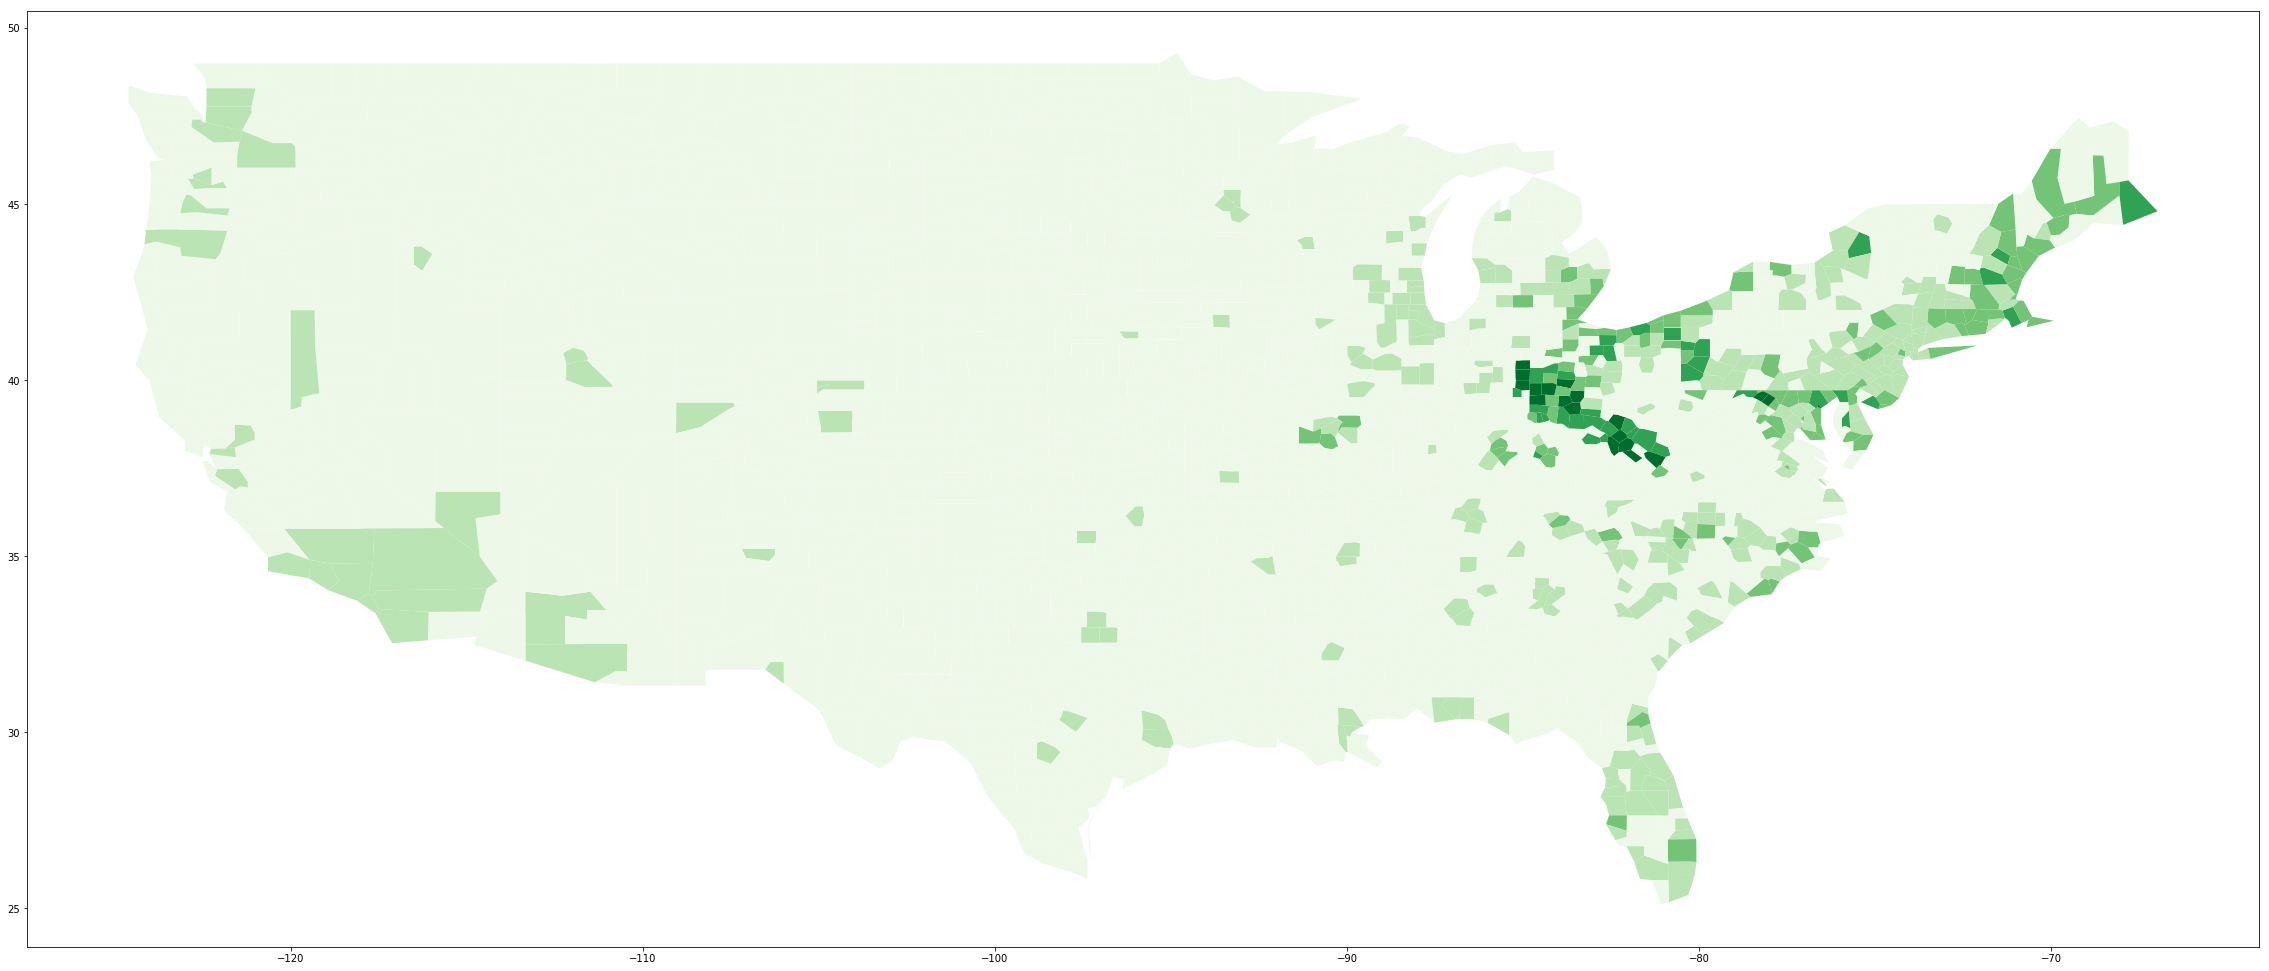

In [351]:
f, ax = plt.subplots(1, figsize=(40, 40))
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0, '#edf8e9'), (0.25, '#bae4b3'), (0.50, '#74c476'), (0.75, '#31a354'), (1, '#006d2c')])
ax = geodf[geodf.year == 2017].plot(column = 'color', axes = ax, cmap = cmap)
plt.savefig('2017map.png')
plt.show()

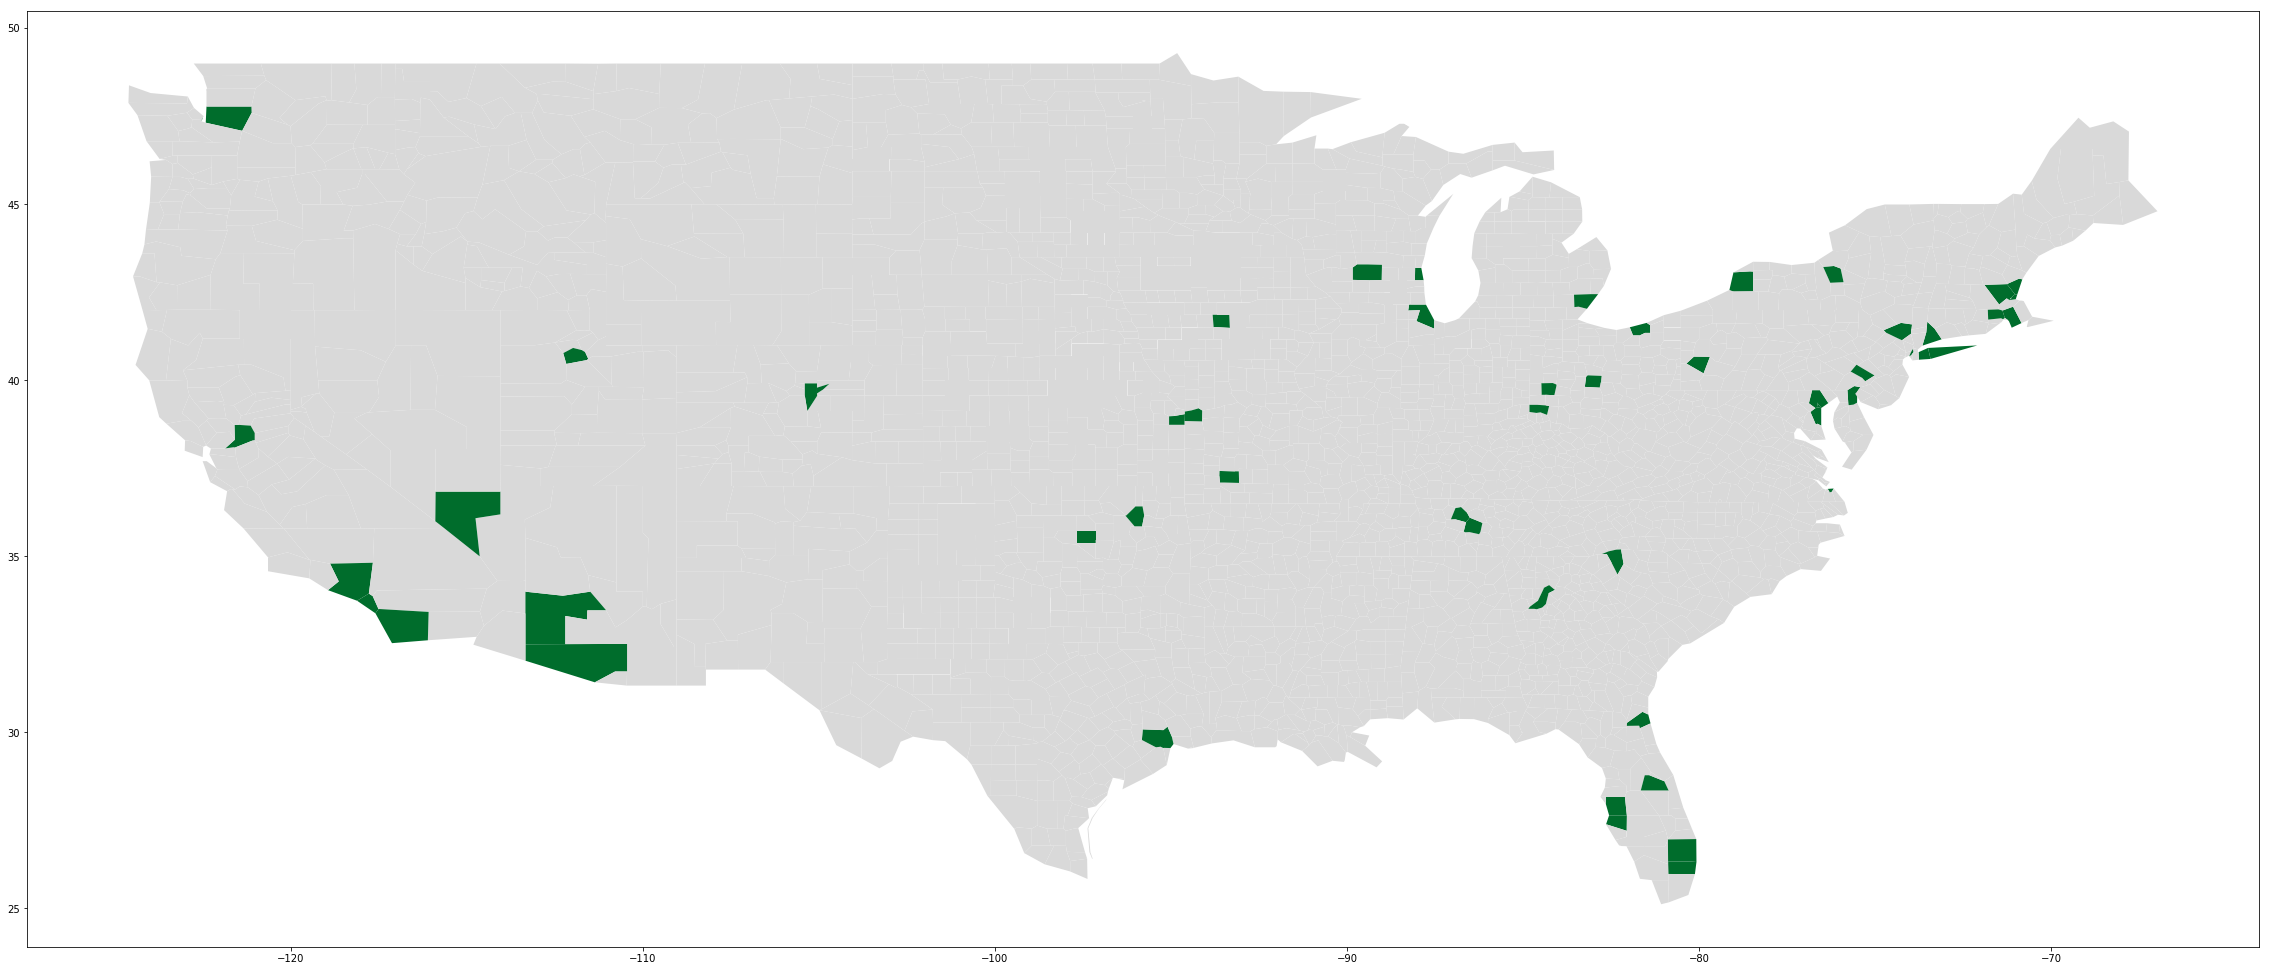

In [339]:
f, ax = plt.subplots(1, figsize=(40, 40))
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0, '#d9d9d9'), (0.25, '#bae4b3'), (0.5, '#74c476'), (0.75, '#31a354'), (1, '#006d2c')])
ax = geodf[geodf.year == 2013].plot(column = 'color', axes = ax, cmap = cmap)
plt.savefig('2015map.png')
plt.show()

In [302]:
geodf[geodf.year == 2017].to_file('map.geojson', driver = 'GeoJSON')

GeometryTypeValidationError: Record's geometry type does not match collection schema's geometry type: 'MultiPolygon' != 'Polygon'

In [329]:
cmap

In [ ]:
# use regression to predict missing values
# some sort of regression with constraint because we know what the values have to add up to
# sum up by state, subtract known ones, get proportion for county, distribute based on 
# for now do super crude prediction where we take the value over all years and distribute it, can also take values by state

In [ ]:
# to do today
# redownload with age adjusted
# finish dataset, fill in missing values, get rent burden information
# fix gif and maps to have legend, title, year display
# do whatever spatial analysis
# identify centroids of clusters
# identify resistent counties

In [406]:
rent_burden = pd.read_csv('ACS_17_5YR_B25074_with_ann.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 2: invalid continuation byte

In [ ]:
rent_burden

In [407]:
fent

,county,county_code,year,deaths,population,crude_rate,state,predicted_deaths
0,"Autauga County, AL",1001,1999.0,0,42963,Suppressed,AL,NaN
1,"Autauga County, AL",1001,2000.0,0,43671,Suppressed,AL,NaN
2,"Autauga County, AL",1001,2001.0,0,44889,Suppressed,AL,NaN
3,"Autauga County, AL",1001,2002.0,0,45909,Suppressed,AL,NaN
4,"Autauga County, AL",1001,2003.0,0,46800,Suppressed,AL,NaN
5,"Autauga County, AL",1001,2004.0,0,48366,Suppressed,AL,NaN
6,"Autauga County, AL",1001,2005.0,0,49676,Suppressed,AL,NaN
7,"Autauga County, AL",1001,2006.0,0,51328,Suppressed,AL,NaN
8,"Autauga County, AL",1001,2007.0,0,52405,Suppressed,AL,NaN
9,"Autauga County, AL",1001,2008.0,0,53277,Suppressed,AL,NaN
